## Imports

In [11]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Data loading

In [3]:
path = Path("C:/Users/user/Google Drive/Els_meus_documents/projectes/CompetitiveIntelligence/WRI/Notebooks/Data/finetuningResults")
filename = "FineTuningResults.json"
file = path / filename
with open(file, "r") as f:
    F1 = json.load(f)

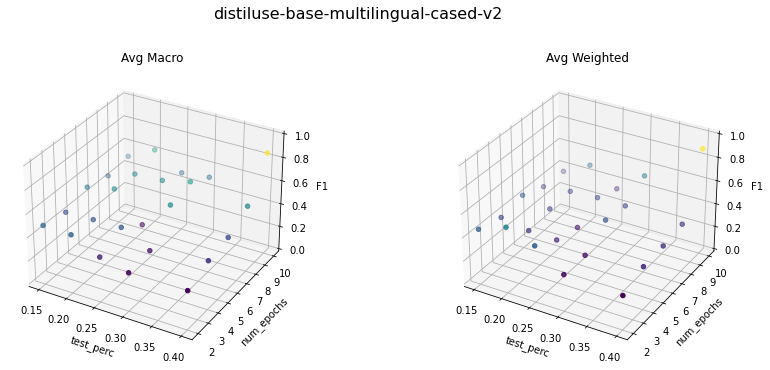

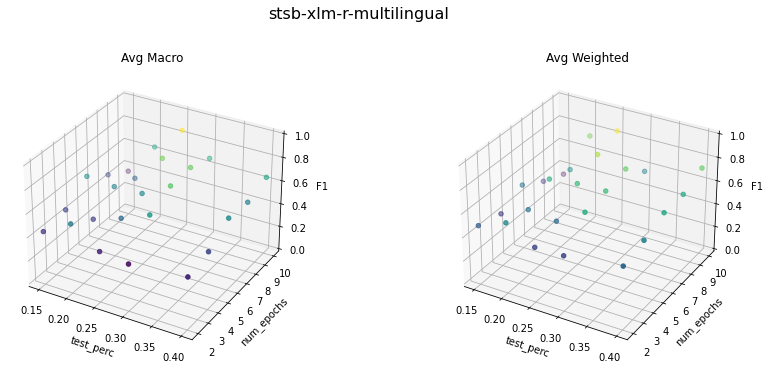

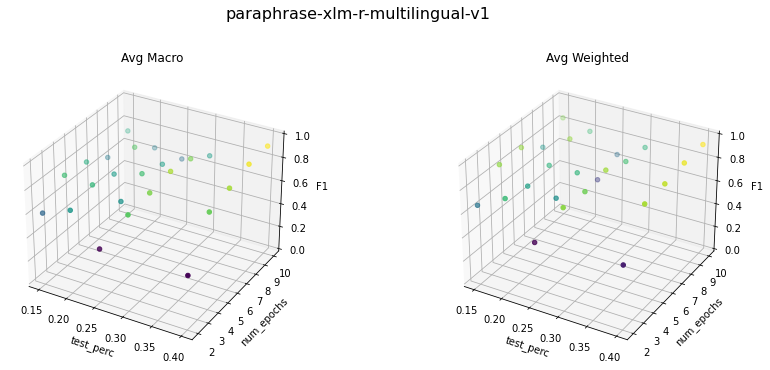

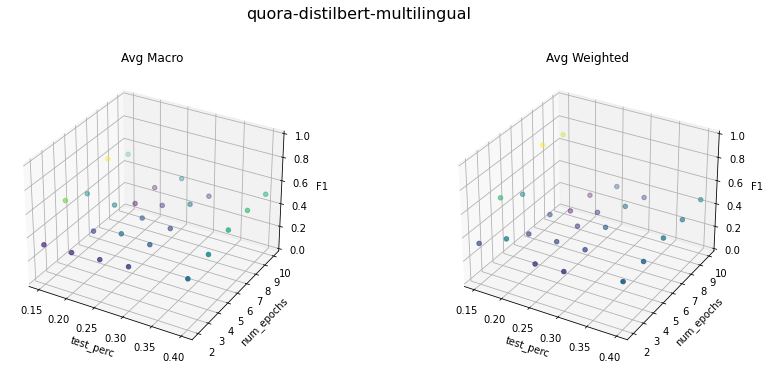

In [71]:
models = ["distiluse-base", "stsb-xlm-r", "paraphrase-xlm-r", "quora-distilbert"]
for model, M_results in F1.items():
    x = []; y = []; z1 = []; z2 = []
    
#     fig, axs = plt.subplots(1, 2, figsize = (13,5))
    fig = plt.figure(figsize = (13,6))    
    ax1 = fig.add_subplot(121, projection='3d'); ax2 = fig.add_subplot(122, projection='3d')
    
    for test_perc, T_results in M_results.items():
        for item in T_results:
            perc = test_perc.split("=")[1]
            x.append(float(perc)); y.append(item['num_epochs']);z1.append(item['avg_f1'][0]); z2.append(item['avg_f1'][1])
    fig.suptitle(model, fontsize=16)
    ax1.set_zlim(0, 1); ax2.set_zlim(0, 1)
    ax1.set_xlabel('test_perc'); ax2.set_xlabel('test_perc')
    ax1.set_ylabel('num_epochs'); ax2.set_ylabel('num_epochs')
    ax1.set_zlabel('F1'); ax2.set_zlabel('F1')
    ax1.set_title('Avg Macro'); ax2.set_title('Avg Weighted')
    fig.subplots_adjust(wspace=0.5)
    ax1.scatter3D(np.array(x), np.array(y), np.array(z1), c=np.array(z1), cmap='viridis')
    ax2.scatter3D(np.array(x), np.array(y), np.array(z2), c=np.array(z2), cmap='viridis')

#     ax1.set_zlim(0, 1); ax2.set_zlim(0, 1)    
#     ax1.zaxis.set_major_locator(LinearLocator(10)); ax2.zaxis.set_major_locator(LinearLocator(10))
#     ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f')); ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    plt.show()
    
  

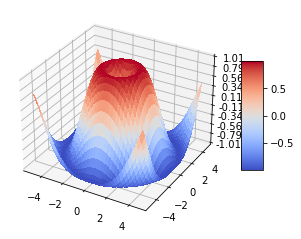

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [25]:
X

array([['0.15', '0.15', '0.15', '0.15', '0.15', '0.2', '0.2', '0.2',
        '0.2', '0.2', '0.25', '0.25', '0.25', '0.25', '0.25', '0.3',
        '0.3', '0.3', '0.3', '0.3', '0.4', '0.4', '0.4', '0.4', '0.4'],
       ['0.15', '0.15', '0.15', '0.15', '0.15', '0.2', '0.2', '0.2',
        '0.2', '0.2', '0.25', '0.25', '0.25', '0.25', '0.25', '0.3',
        '0.3', '0.3', '0.3', '0.3', '0.4', '0.4', '0.4', '0.4', '0.4'],
       ['0.15', '0.15', '0.15', '0.15', '0.15', '0.2', '0.2', '0.2',
        '0.2', '0.2', '0.25', '0.25', '0.25', '0.25', '0.25', '0.3',
        '0.3', '0.3', '0.3', '0.3', '0.4', '0.4', '0.4', '0.4', '0.4'],
       ['0.15', '0.15', '0.15', '0.15', '0.15', '0.2', '0.2', '0.2',
        '0.2', '0.2', '0.25', '0.25', '0.25', '0.25', '0.25', '0.3',
        '0.3', '0.3', '0.3', '0.3', '0.4', '0.4', '0.4', '0.4', '0.4'],
       ['0.15', '0.15', '0.15', '0.15', '0.15', '0.2', '0.2', '0.2',
        '0.2', '0.2', '0.25', '0.25', '0.25', '0.25', '0.25', '0.3',
        '0.3', '0.3', 